Pyber Analysis

According to the data set; Urban areas have the largest percentages of fares, rides and drivers with rates of 62.7%, 68.4% and 86.7% respectively. 


The bubble plot shows that most rides occur in Urban areas and that the most expensive rides occur in Rural areas.



In [1]:
%matplotlib inline
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
# File to Load (Remember to change these)
#city_data = "data/city_data.csv"
#ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")
# Combine the data into a single dataset
city_ride_data = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
area = city_ride_data.set_index("type")
area.head()

city_ride_data["type"].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

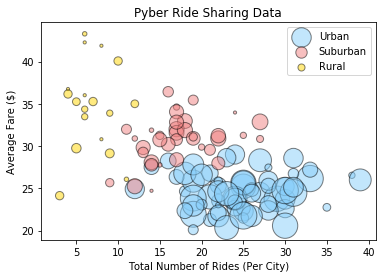

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = city_ride_data[city_ride_data["type"] == "Urban"]

urban_rides = urban_cities.groupby(["city"]).count()["ride_id"]
urban_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver = urban_cities.groupby(["city"]).mean()["driver_count"]
#us = (urban_rides * urban_fare * urban_driver)

suburban_cities = city_ride_data[city_ride_data["type"] == "Suburban"]
suburban_rides = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_cities = city_ride_data[city_ride_data["type"] == "Rural"]
rural_rides = rural_cities.groupby(["city"]).count()["ride_id"]
rural_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver = rural_cities.groupby(["city"]).mean()["driver_count"]
# Build the scatter plots for each city types
urban = plt.scatter(urban_rides, urban_fare, marker = "o", c="lightskyblue", s=10*urban_driver,
                    edgecolors="black", alpha=0.5, label="Urban")

suburban = plt.scatter(suburban_rides, suburban_fare, marker = "o", s=10*suburban_driver,
                       c="lightcoral", edgecolors="black", alpha=0.5, label="Suburban")

rural = plt.scatter(rural_rides, rural_fare, marker = "o", c="gold", s=10*rural_driver,
                    edgecolors="black", alpha=0.5, label="Rural")

#plt.xlim(5,40)
#plt.ylim(15,45)

# Incorporate the other graph properties
plt.legend(handles=[urban, suburban, rural])
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
#plt.title(x=35, y=45 "Note: circle size correlates with driver count.")
# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Pyber/pyber_scatter.png")

plt.show()

## Total Fares by City Type

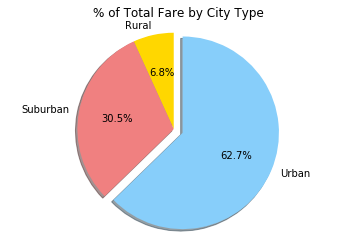

In [6]:
# Calculate Type Percents
#city_type = city_ride_data["type"].value_counts()
#fare = city_ride_data.groupby(["fare", "type"])
#fare_group = city_ride_data.drop("driver_count", "ride_id")
#sum_fare = fare.sum()
city_type = city_ride_data.groupby(["type"])
total_fare = city_type["fare"].sum()
city_fare = pd.DataFrame({"Total Fare":total_fare})
#print(city_fare)
#fare_group.head()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.10)
fig1, ax1 = plt.subplots()
ax1.pie(city_fare, explode=explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=90)  
#fare_pie = city_fare.plot(kind="pie", y=city_type)

plt.title("% of Total Fare by City Type")
plt.axis("equal")



# Save Figure
plt.savefig("../Pyber/fare.png")


# Show Figure
plt.show()

## Total Rides by City Type

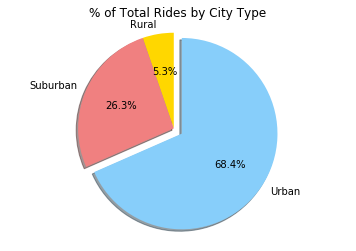

In [11]:
# Calculate Ride Percents
total_ride = city_type["ride_id"].count()
city_ride = pd.DataFrame({"Total Rides":total_ride})
#print(city_ride)
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.10)
fig2, ax2 = plt.subplots()
ax2.pie(city_ride, explode=explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=90)  

plt.title("% of Total Rides by City Type")
plt.axis("equal")
# Save Figure
plt.savefig("../Pyber/ride.png")

# Show Figure
plt.show()




## Total Drivers by City Type

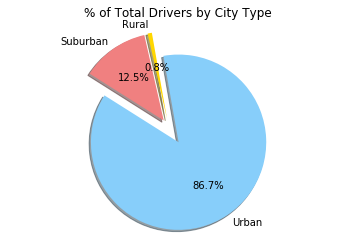

In [36]:
# Calculate Driver Percents
total_drivers = city_type["driver_count"].sum()
city_drivers = pd.DataFrame({"Total Drivers":total_drivers})
#print(city_drivers)
# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0.10, 0.10, 0.20)
fig2, ax2 = plt.subplots()
ax2.pie(city_drivers, explode=explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=100) 

plt.title("% of Total Drivers by City Type")
plt.axis("equal")
# Save Figure
plt.savefig("../Pyber/drive.png")
#Show Figure
plt.show()


